In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os, sys
import random

from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [96]:
app_train = pd.read_csv('data/application_train.csv')
app_test = pd.read_csv('data/application_test.csv')

In [97]:
app_train.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [98]:
app_train['TARGET'].value_counts() / app_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [99]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [100]:
def show_hist_by_target(df, columns):
  cond_0 = df['TARGET'] == 0
  cond_1 = df['TARGET'] == 1

  for column in columns:
    print('column name: ', column)
    fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    sns.violinplot(x='TARGET', y=column, data=df, ax=axs[0][0]) # It take long time to create violinplot
    sns.distplot(df[cond_0][column], label='0', color='blue', ax=axs[0][1])
    sns.distplot(df[cond_1][column], label='1', color='red', ax=axs[0][1])


column name:  AMT_INCOME_TOTAL
column name:  AMT_CREDIT
column name:  AMT_ANNUITY
column name:  AMT_GOODS_PRICE
column name:  DAYS_BIRTH
column name:  DAYS_EMPLOYED
column name:  DAYS_ID_PUBLISH
column name:  DAYS_REGISTRATION
column name:  DAYS_LAST_PHONE_CHANGE
column name:  CNT_FAM_MEMBERS
column name:  REGION_RATING_CLIENT
column name:  EXT_SOURCE_1
column name:  EXT_SOURCE_2
column name:  EXT_SOURCE_3
column name:  AMT_REQ_CREDIT_BUREAU_HOUR
column name:  AMT_REQ_CREDIT_BUREAU_DAY
column name:  AMT_REQ_CREDIT_BUREAU_WEEK
column name:  AMT_REQ_CREDIT_BUREAU_MON
column name:  AMT_REQ_CREDIT_BUREAU_QRT
column name:  AMT_REQ_CREDIT_BUREAU_YEAR


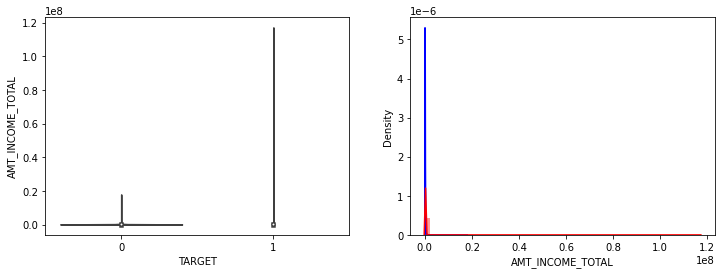

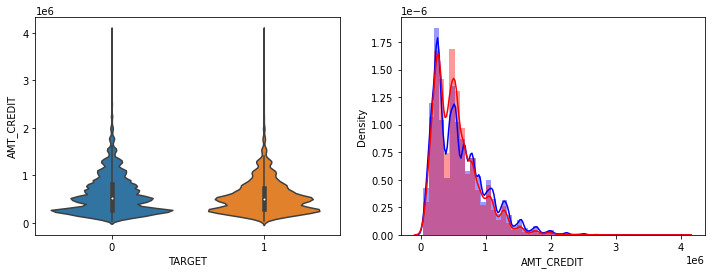

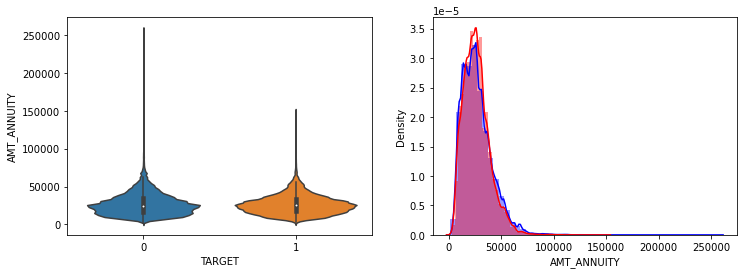

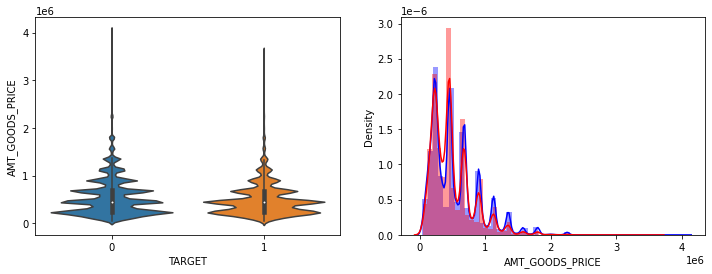

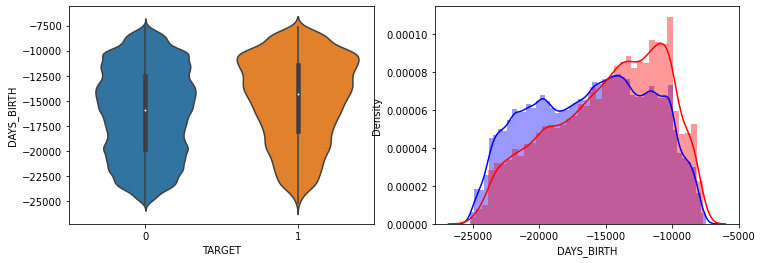

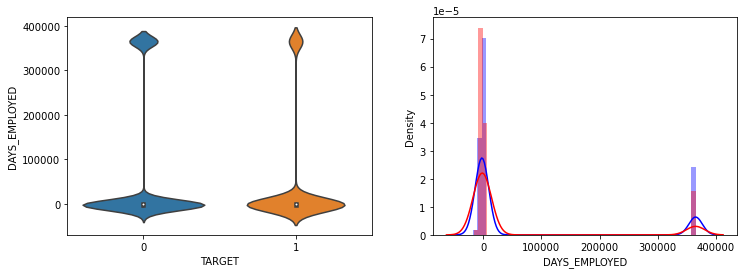

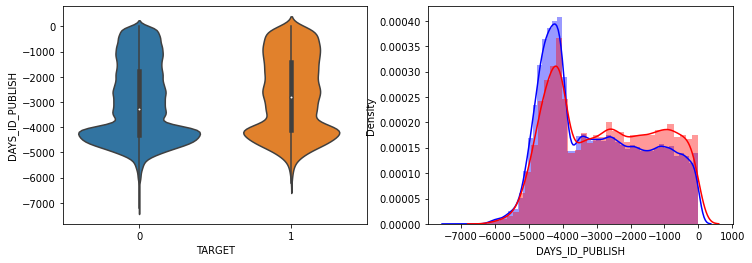

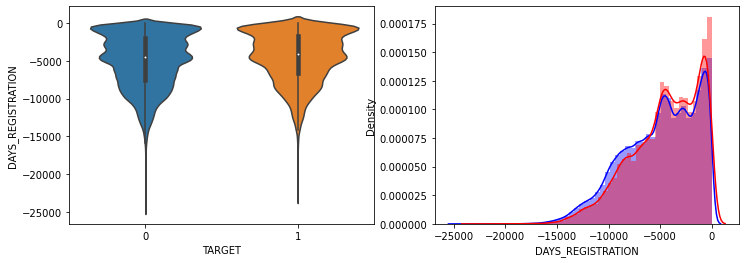

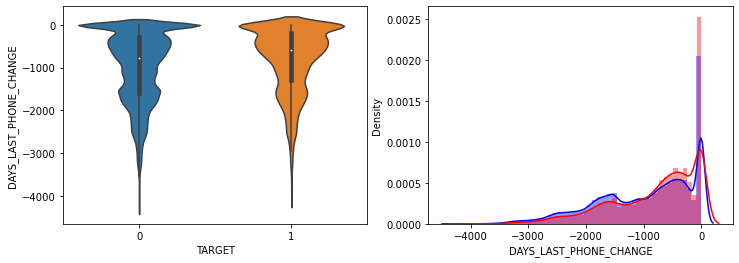

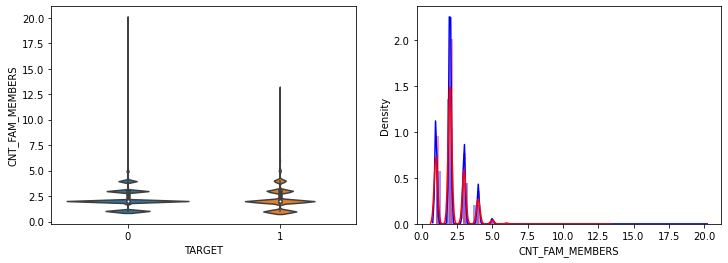

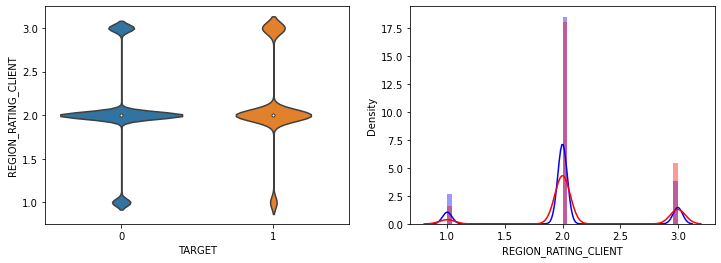

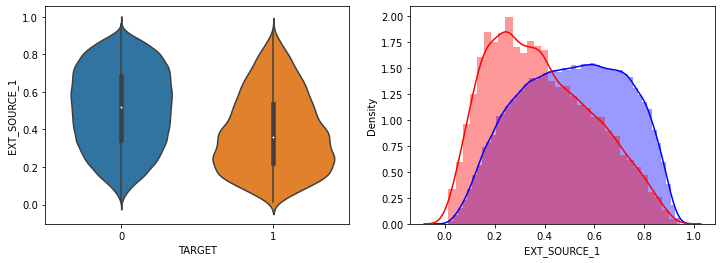

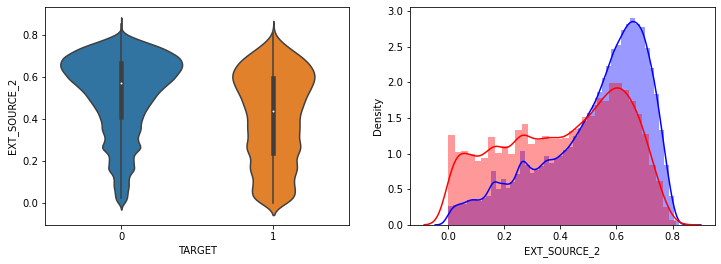

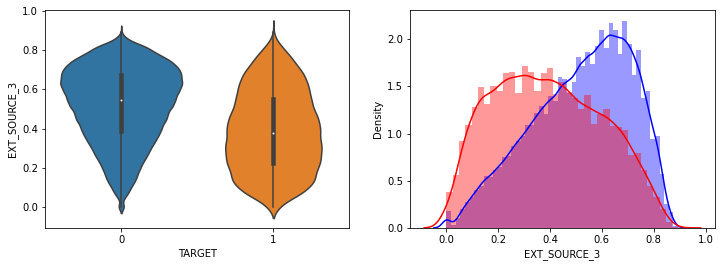

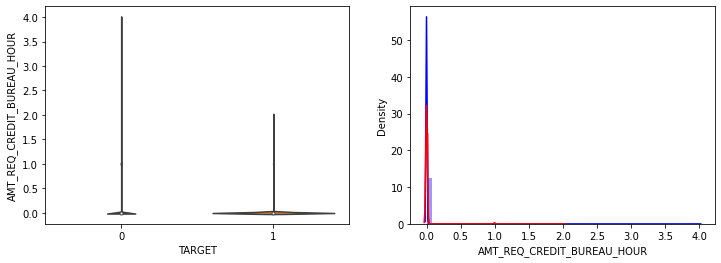

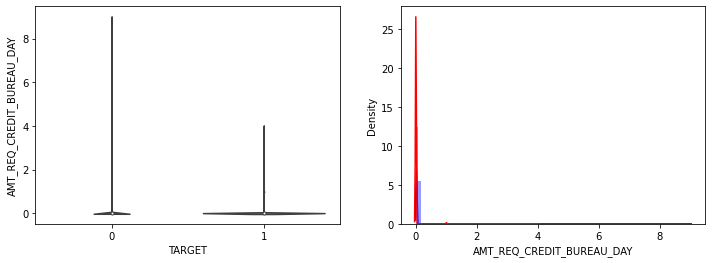

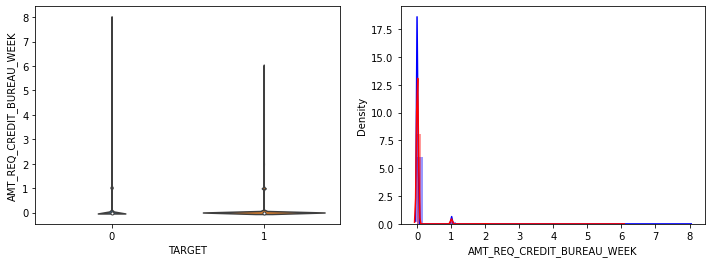

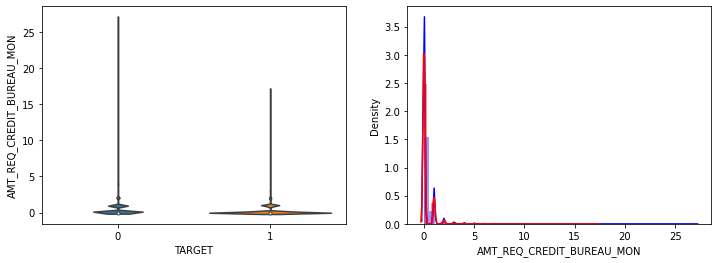

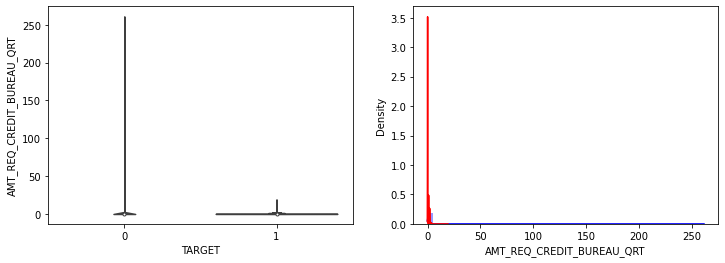

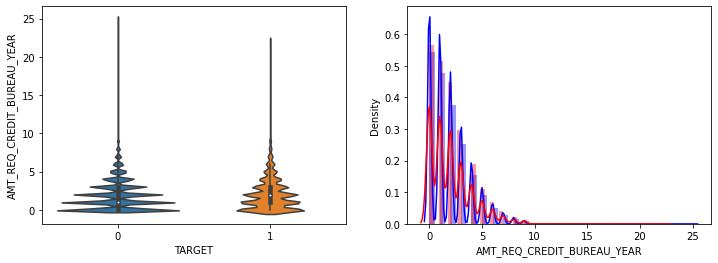

In [101]:
columns = [ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
            'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
            'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
            'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
          ]

show_hist_by_target(app_train, columns)

<AxesSubplot:>

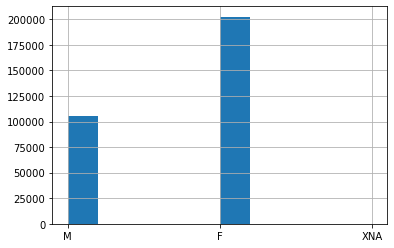

In [102]:
app_train['CODE_GENDER'].hist()

In [103]:
object_colums = app_train.dtypes[app_train.dtypes == 'object'].index.tolist()

column name:  NAME_CONTRACT_TYPE
column name:  CODE_GENDER
column name:  FLAG_OWN_CAR
column name:  FLAG_OWN_REALTY
column name:  NAME_TYPE_SUITE
column name:  NAME_INCOME_TYPE
column name:  NAME_EDUCATION_TYPE
column name:  NAME_FAMILY_STATUS
column name:  NAME_HOUSING_TYPE
column name:  OCCUPATION_TYPE
column name:  WEEKDAY_APPR_PROCESS_START
column name:  ORGANIZATION_TYPE
column name:  FONDKAPREMONT_MODE
column name:  HOUSETYPE_MODE
column name:  WALLSMATERIAL_MODE
column name:  EMERGENCYSTATE_MODE


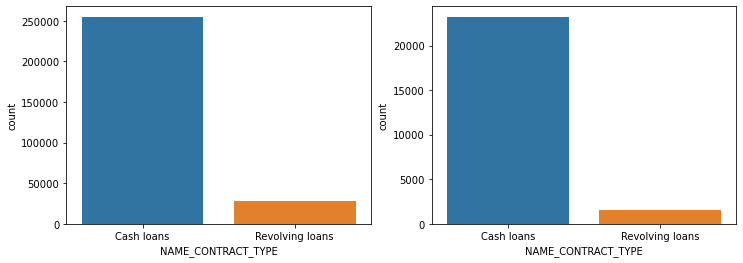

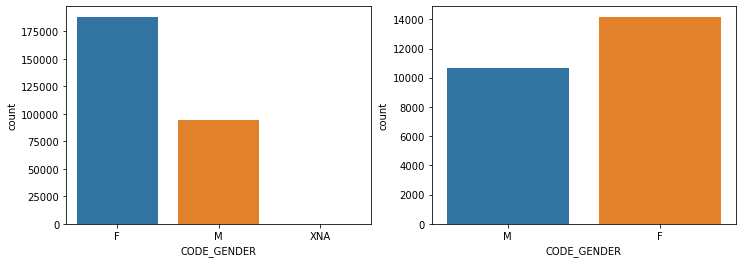

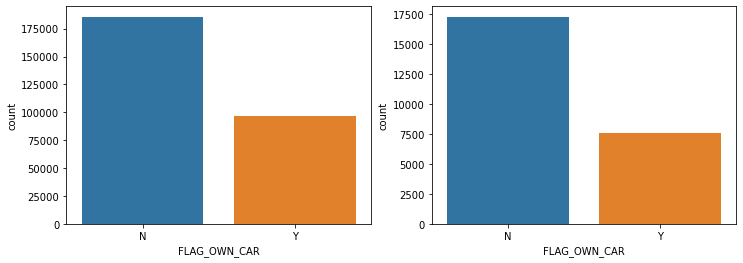

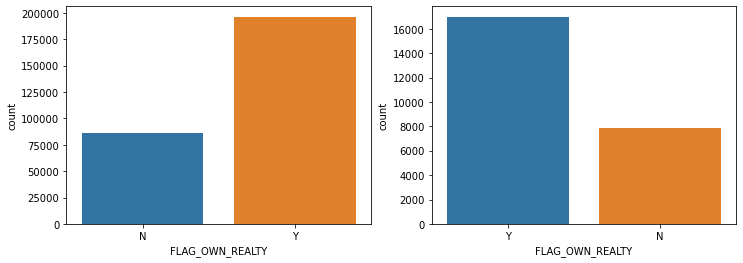

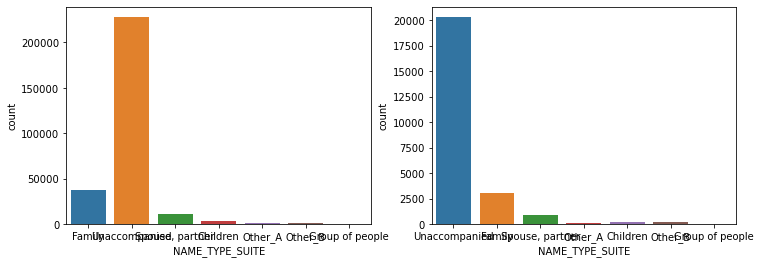

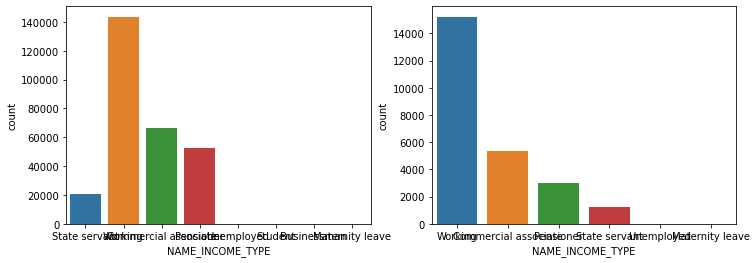

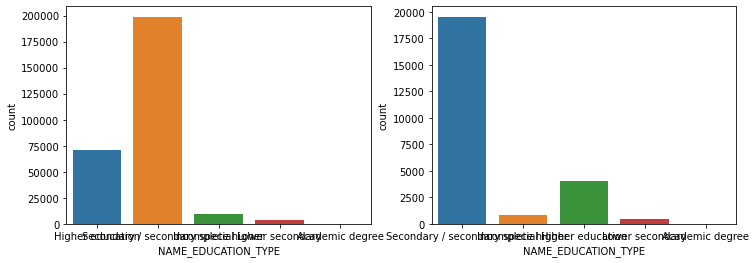

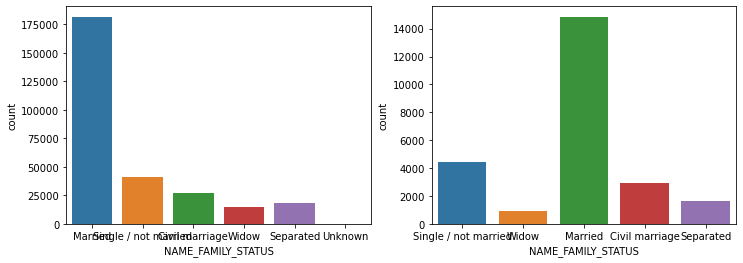

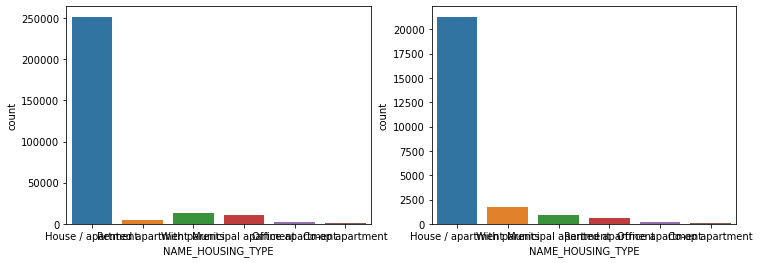

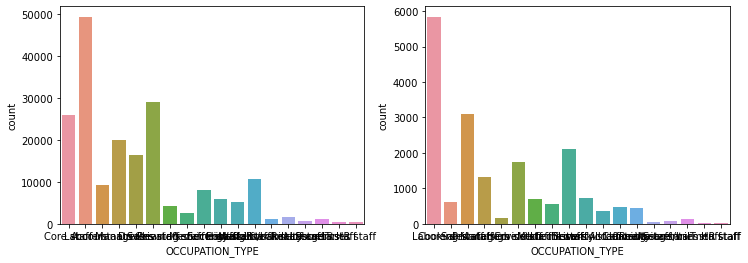

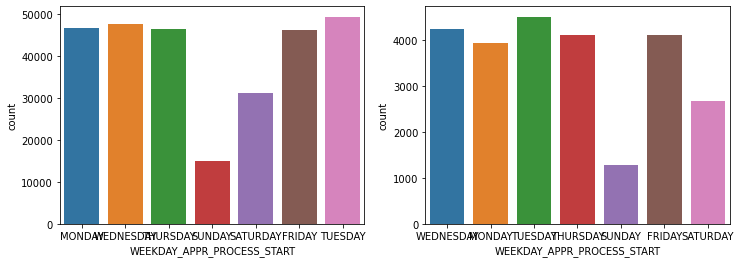

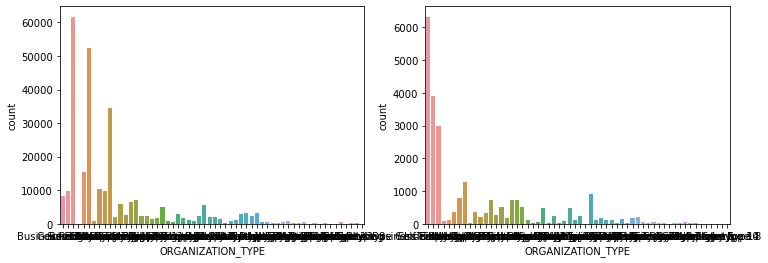

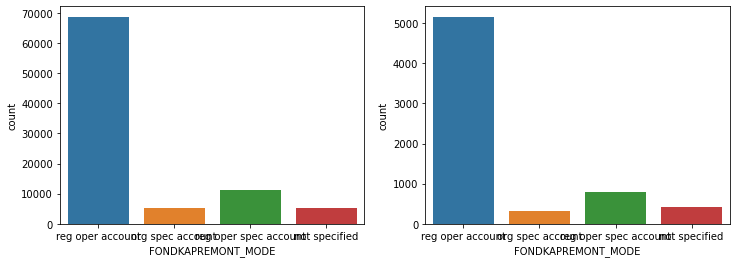

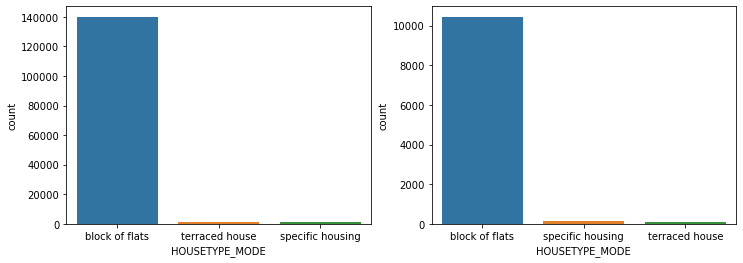

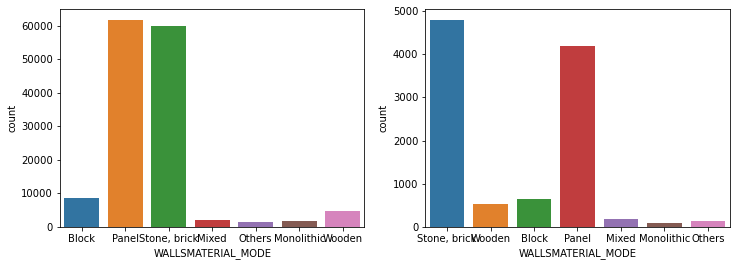

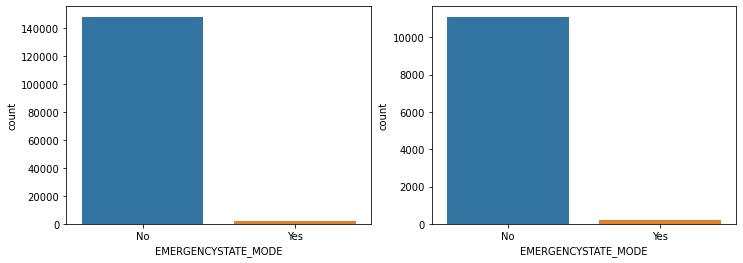

In [104]:
def show_count_by_target(df, columns):
  cond_0 = df['TARGET'] == 0
  cond_1 = df['TARGET'] == 1

  for column in columns:
    print('column name: ', column)
    fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    sns.countplot(df[cond_0][column], ax=axs[0][0])
    sns.countplot(df[cond_1][column], ax=axs[0][1])

show_count_by_target(app_train, object_colums)

column name:  NAME_CONTRACT_TYPE
column name:  CODE_GENDER
column name:  FLAG_OWN_CAR
column name:  FLAG_OWN_REALTY
column name:  NAME_TYPE_SUITE
column name:  NAME_INCOME_TYPE
column name:  NAME_EDUCATION_TYPE
column name:  NAME_FAMILY_STATUS
column name:  NAME_HOUSING_TYPE
column name:  OCCUPATION_TYPE
column name:  WEEKDAY_APPR_PROCESS_START
column name:  ORGANIZATION_TYPE
column name:  FONDKAPREMONT_MODE
column name:  HOUSETYPE_MODE
column name:  WALLSMATERIAL_MODE
column name:  EMERGENCYSTATE_MODE


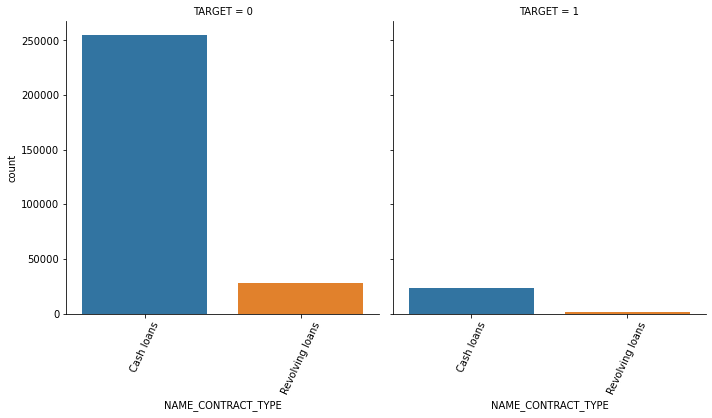

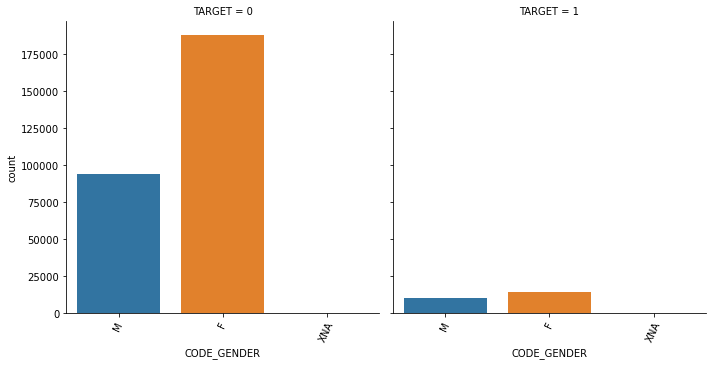

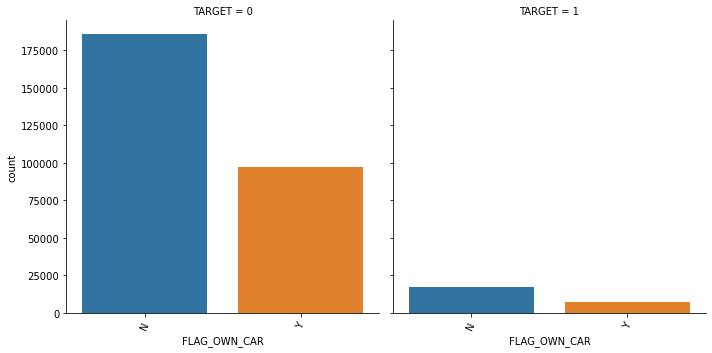

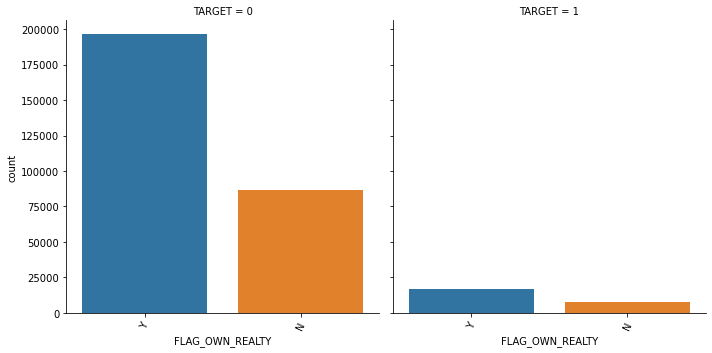

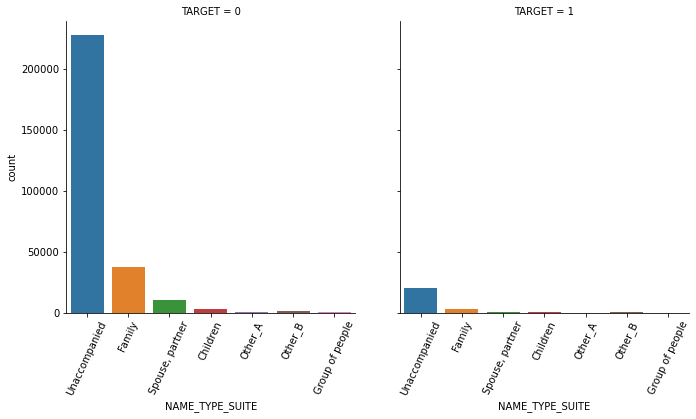

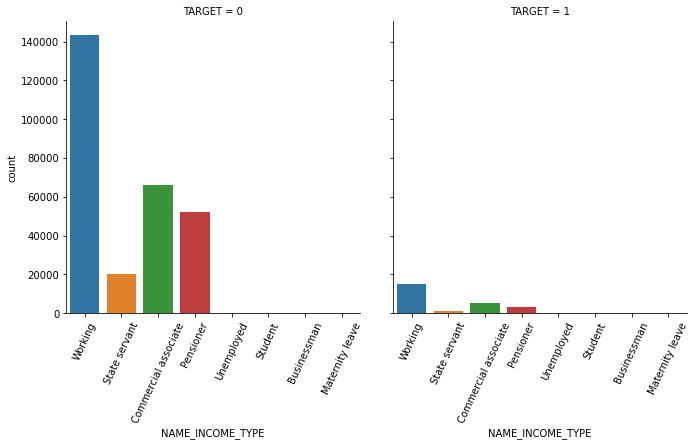

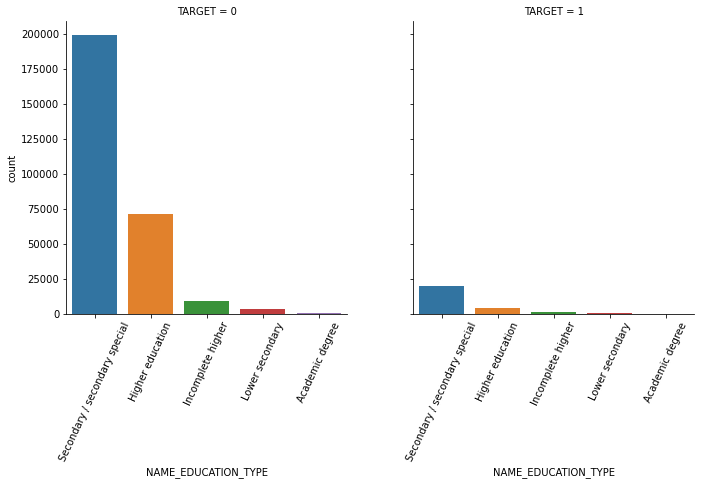

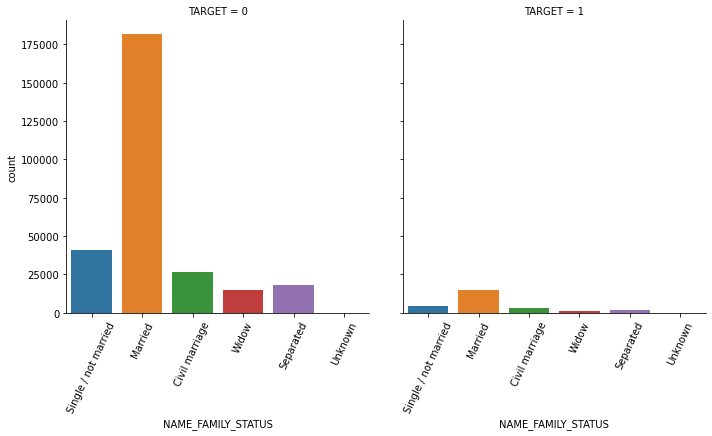

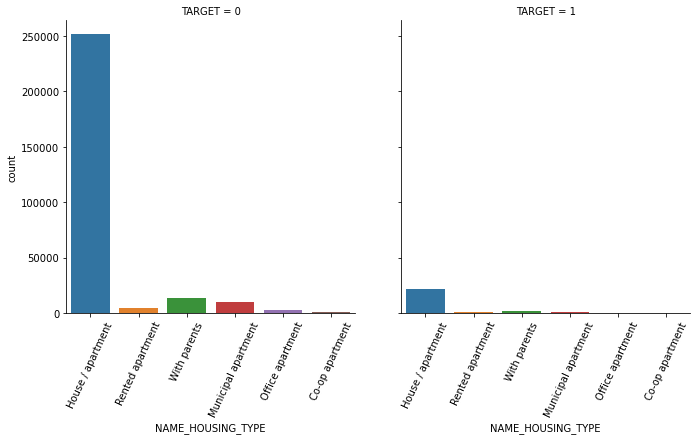

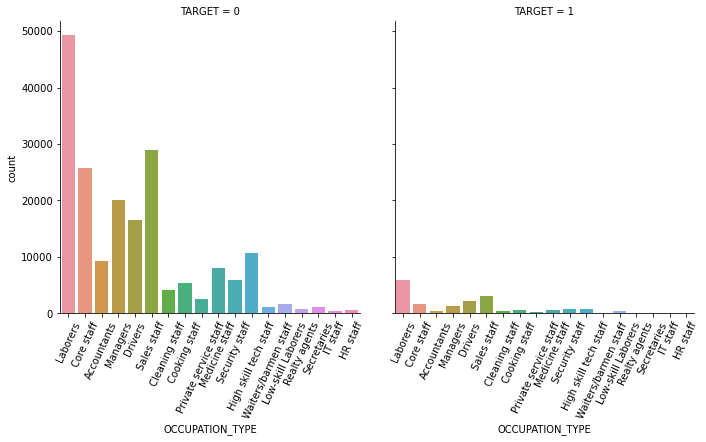

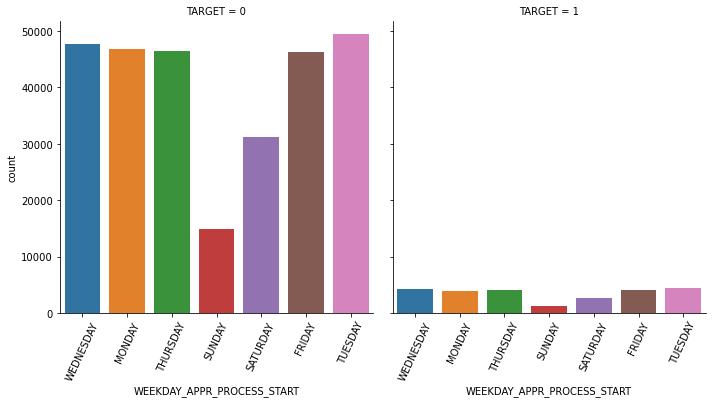

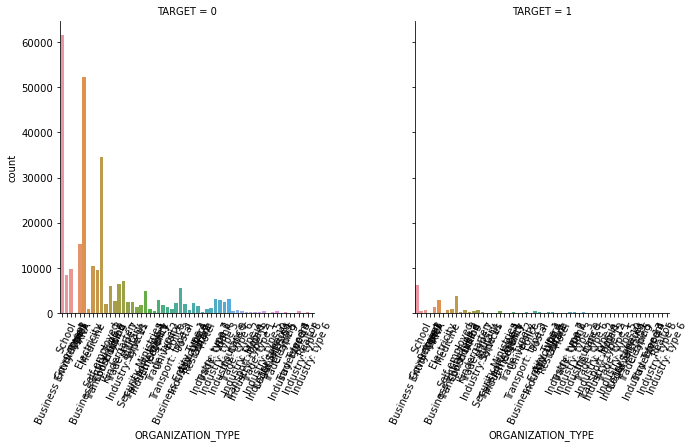

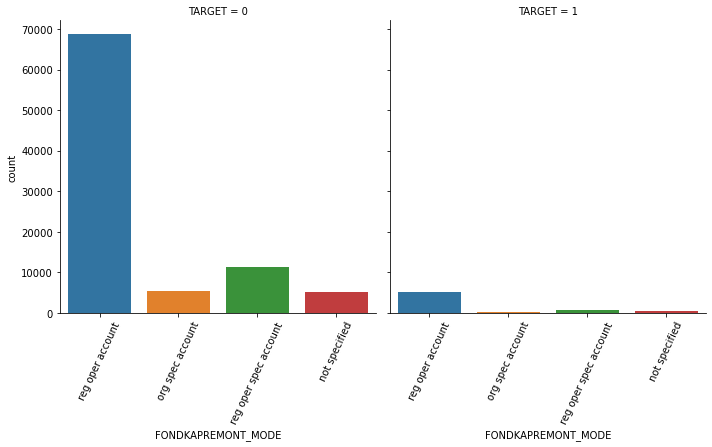

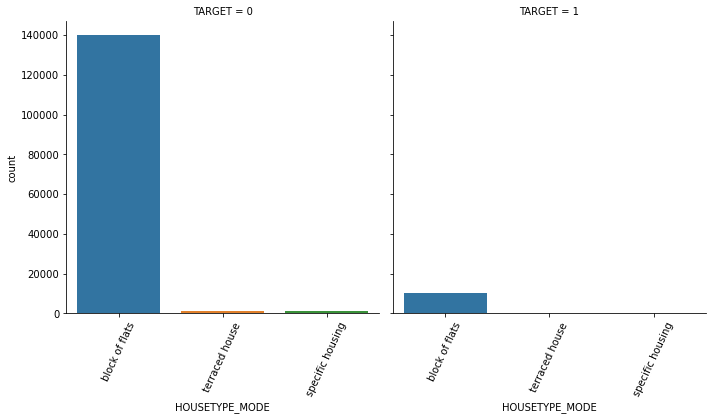

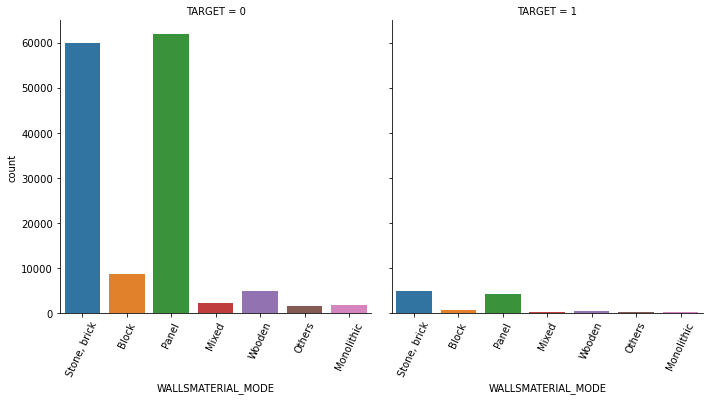

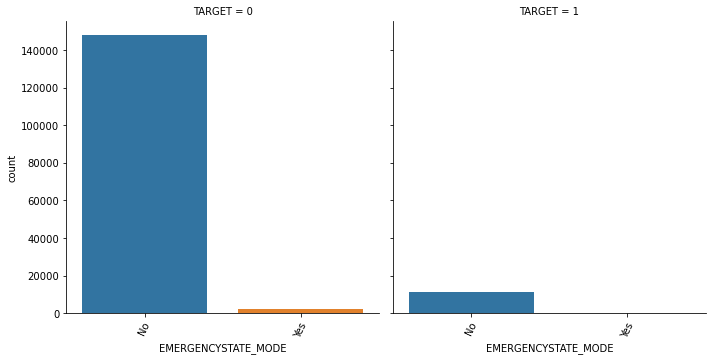

In [105]:
def show_category_by_target(df, columns):
  for column in columns:
    print('column name: ', column)
    chart = sns.catplot(x=column, col='TARGET', data=df, kind='count')
    chart.set_xticklabels(rotation=65)

show_category_by_target(app_train, object_colums)

In [106]:
cond_0 = app_train['TARGET'] == 0
cond_1 = app_train['TARGET'] == 1

print(app_train['CODE_GENDER'].value_counts() / app_train.shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


In [107]:
print(app_train[cond_1]['CODE_GENDER'].value_counts() / app_train[cond_1].shape[0])

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64


In [108]:
print(app_train[cond_0]['CODE_GENDER'].value_counts() / app_train[cond_0].shape[0])

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


In [109]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']

corr = app_train[corr_columns].corr()

<AxesSubplot:>

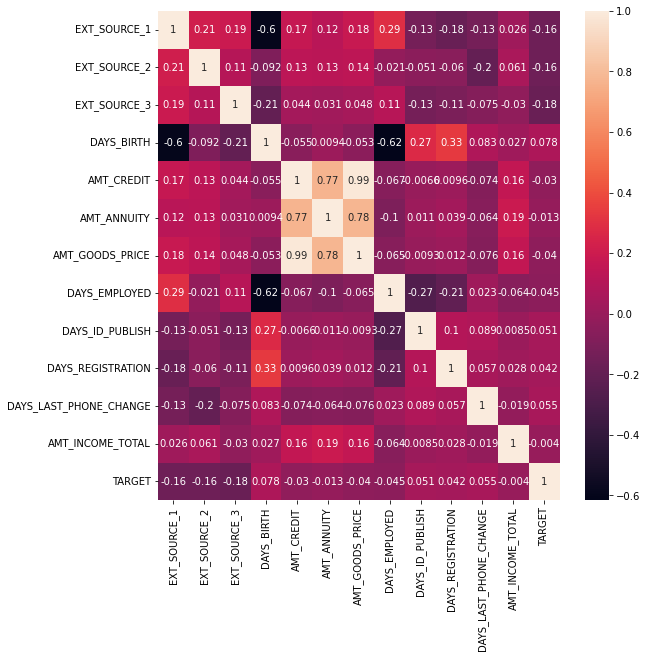

In [110]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True)

In [111]:
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [112]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

 NaN        55374
-200.0        156
-224.0        152
-230.0        151
-199.0        151
            ...  
-13961.0        1
-11827.0        1
-10176.0        1
-9459.0         1
-8694.0         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [113]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [114]:
app_train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.581015         5
0.546426         5
0.443982         5
0.765724         5
             ...  
0.658473         1
0.318295         1
0.834644         1
0.485406         1
0.734460         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [115]:
app_train['EXT_SOURCE_2'].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [116]:
app_train['EXT_SOURCE_3'].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.028674        1
0.025272        1
0.021492        1
0.014556        1
0.043227        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [117]:
print('mean: \n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print('max: \n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print('min: \n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print('std: \n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

mean: 
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
max: 
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
min: 
 EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64
std: 
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


In [118]:
apps = pd.concat([app_train, app_test])
print(apps.shape)

(356255, 122)


In [119]:
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


In [120]:
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [121]:
apps['APPS_EXT_SOURCE_MEAN']

0        0.161787
1        0.466757
2        0.642739
3        0.650442
4        0.322738
           ...   
48739    0.645800
48740    0.684596
48741    0.549995
48742    0.471416
48743    0.364337
Name: APPS_EXT_SOURCE_MEAN, Length: 356255, dtype: float64

In [122]:
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
apps['APPS_EXT_SOURCE_STD']

0        0.092026
1        0.219895
2        0.122792
3             NaN
4             NaN
           ...   
48739    0.003924
48740         NaN
48741    0.236044
48742    0.113391
48743    0.130395
Name: APPS_EXT_SOURCE_STD, Length: 356255, dtype: float64

In [123]:
apps.iloc[:, -2:].head()

,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.161787,0.092026
1,0.466757,0.219895
2,0.642739,0.122792
3,0.650442,NaN
4,0.322738,NaN


In [124]:
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APPS_EXT_SOURCE_MEAN', 'APPS_EXT_SOURCE_STD']].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.083037,0.262949,0.139376,0.161787,0.092026
1,0.311267,0.622246,NaN,0.466757,0.219895
2,NaN,0.555912,0.729567,0.642739,0.122792
3,NaN,0.650442,NaN,0.650442,NaN
4,NaN,0.322738,NaN,0.322738,NaN


In [127]:
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())

In [128]:
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']


In [129]:
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']

In [130]:
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

In [132]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [133]:
for column in object_columns:
  apps[column] = apps[column].factorize()[0]

apps[object_columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,1,2,-1,-1,-1,-1
3,0,1,0,0,0,0,0,2,0,0,0,0,-1,-1,-1,-1
4,0,0,0,0,0,0,0,0,0,1,2,3,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,1,0,0,0,0,0,3,0,-1,0,4,-1,-1,-1,-1
48740,0,1,0,1,0,2,0,1,0,5,1,14,-1,-1,-1,-1
48741,0,1,1,0,0,2,0,1,0,-1,0,0,-1,0,0,0
48742,0,0,0,1,1,2,1,1,0,3,1,9,-1,0,2,0


In [134]:
apps.shape

(356255, 134)

In [136]:
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]

apps.shape, apps_train.shape, apps_test.shape

((356255, 134), (307511, 134), (48744, 134))

In [137]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)

train_x.shape, valid_x.shape

((215257, 132), (92254, 132))

In [138]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_jobs=-1, n_estimators=1000, learning_rate=0.02, num_leaves=32, subsample=0.8, max_depth=12, silent=-1, verbose=-1)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],eval_metric='auc', verbose=100, early_stopping_rounds=100)

[100]	training's auc: 0.758727	training's binary_logloss: 0.247862	valid_1's auc: 0.749255	valid_1's binary_logloss: 0.24972
[200]	training's auc: 0.77977	training's binary_logloss: 0.240736	valid_1's auc: 0.760462	valid_1's binary_logloss: 0.245521
[300]	training's auc: 0.793922	training's binary_logloss: 0.236167	valid_1's auc: 0.764572	valid_1's binary_logloss: 0.244078
[400]	training's auc: 0.805275	training's binary_logloss: 0.23257	valid_1's auc: 0.765718	valid_1's binary_logloss: 0.243639
[500]	training's auc: 0.815598	training's binary_logloss: 0.229312	valid_1's auc: 0.766068	valid_1's binary_logloss: 0.243511
[600]	training's auc: 0.824964	training's binary_logloss: 0.226272	valid_1's auc: 0.766251	valid_1's binary_logloss: 0.243444
[700]	training's auc: 0.834055	training's binary_logloss: 0.223315	valid_1's auc: 0.766438	valid_1's binary_logloss: 0.243352
[800]	training's auc: 0.842415	training's binary_logloss: 0.220498	valid_1's auc: 0.766613	valid_1's binary_logloss: 0.24

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

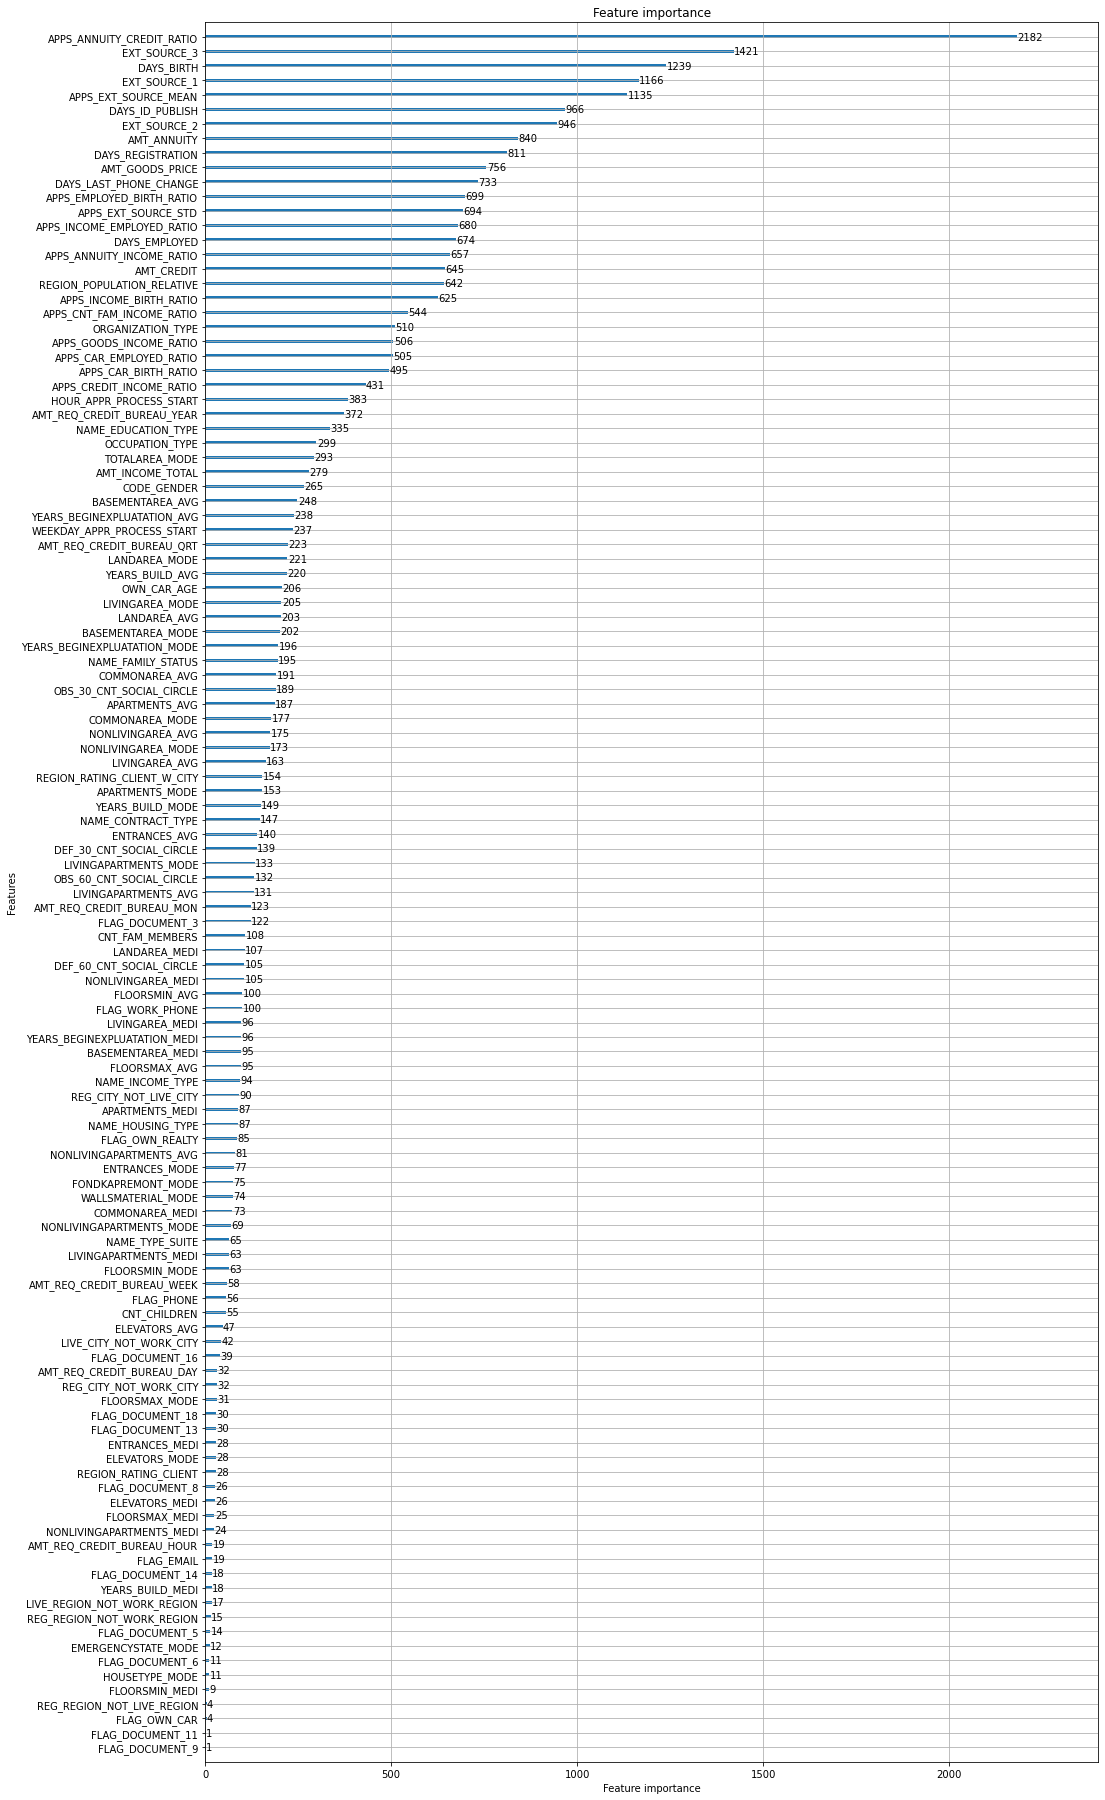

In [139]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [141]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR', 'TARGET'], axis=1))[:, 1]

In [143]:
app_test['TARGET'] = preds
app_test[['SK_ID_CURR', 'TARGET']].to_csv('apps_baseline_02.csv', index=False)